# Exploring NLP concepts


    Importing Libraries
    Segmentation (Sentence Splitting)
    Tokenization
    Stop Words Removal
    Stemming
    Lemmatization
    POS Tagging
    Named Entity Recognition (NER)
    Word Cloud Visualization
    Sentiment Analysis using Naive Bayes

In [1]:
# Importing Libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag, ne_chunk
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


In [27]:
# Download necessary NLTK data
nltk.download("punkt_tab")
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger_eng")
nltk.download("maxent_ne_chunker")
nltk.download("words")
nltk.download("wordnet")


[nltk_data] Downloading package punkt_tab to /Users/3liud/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/3liud/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/3liud/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/3liud/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /Users/3liud/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/3liud/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
# Load SpaCy model
nlp = spacy.load("en_core_web_sm")


In [10]:
# Reading the text from a file (AI.txt)
with open("AI.txt", "r") as file:
    text = file.read()


In [21]:
# 1. Segmentation (Sentence Splitting)
sentences = sent_tokenize(text)
sentences


['\nThird World problems\n\nCountries that got independence from the colonial powers in the last century still rely on old school ideas of development and growth  more money comes from more manufacturing comes from more labour comes from more population comes from more children\n\nBefore mechanization and automation was a thing or when they were too expensive the cheap labour from Asia and Africa oiled the Industrial Revolution creating the first world countries that we see today When we suddenly move away from this thought through mechanization and automation these people are deprived of the very reason of their existence On the other hand the people of the first world countries define other higher purpose goals in life and strive for it justifying the need for mechanization and automation whereas there is no alternative for the people of the third world countries\n\nThen whats the solution\n\n    Decouple people from work\n    Provide basic needs as a fundamental right\n    Provide U

In [22]:
# 2. Tokenization (Word Splitting)
tokens = word_tokenize(text)
print("Word Tokenization:", tokens)


Word Tokenization: ['Third', 'World', 'problems', 'Countries', 'that', 'got', 'independence', 'from', 'the', 'colonial', 'powers', 'in', 'the', 'last', 'century', 'still', 'rely', 'on', 'old', 'school', 'ideas', 'of', 'development', 'and', 'growth', 'more', 'money', 'comes', 'from', 'more', 'manufacturing', 'comes', 'from', 'more', 'labour', 'comes', 'from', 'more', 'population', 'comes', 'from', 'more', 'children', 'Before', 'mechanization', 'and', 'automation', 'was', 'a', 'thing', 'or', 'when', 'they', 'were', 'too', 'expensive', 'the', 'cheap', 'labour', 'from', 'Asia', 'and', 'Africa', 'oiled', 'the', 'Industrial', 'Revolution', 'creating', 'the', 'first', 'world', 'countries', 'that', 'we', 'see', 'today', 'When', 'we', 'suddenly', 'move', 'away', 'from', 'this', 'thought', 'through', 'mechanization', 'and', 'automation', 'these', 'people', 'are', 'deprived', 'of', 'the', 'very', 'reason', 'of', 'their', 'existence', 'On', 'the', 'other', 'hand', 'the', 'people', 'of', 'the', 'fi

In [23]:
# 3. Stop Words Removal
stop_words = set(stopwords.words("english"))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
print("After Stop Words Removal:", filtered_tokens)


After Stop Words Removal: ['Third', 'World', 'problems', 'Countries', 'got', 'independence', 'colonial', 'powers', 'last', 'century', 'still', 'rely', 'old', 'school', 'ideas', 'development', 'growth', 'money', 'comes', 'manufacturing', 'comes', 'labour', 'comes', 'population', 'comes', 'children', 'mechanization', 'automation', 'thing', 'expensive', 'cheap', 'labour', 'Asia', 'Africa', 'oiled', 'Industrial', 'Revolution', 'creating', 'first', 'world', 'countries', 'see', 'today', 'suddenly', 'move', 'away', 'thought', 'mechanization', 'automation', 'people', 'deprived', 'reason', 'existence', 'hand', 'people', 'first', 'world', 'countries', 'define', 'higher', 'purpose', 'goals', 'life', 'strive', 'justifying', 'need', 'mechanization', 'automation', 'whereas', 'alternative', 'people', 'third', 'world', 'countries', 'whats', 'solution', 'Decouple', 'people', 'work', 'Provide', 'basic', 'needs', 'fundamental', 'right', 'Provide', 'Universal', 'Basic', 'Income', 'fulfilling', 'wants', 'g

In [24]:
# 4. Stemming (Porter Stemmer)
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in filtered_tokens]
print("After Stemming:", stemmed_words)


After Stemming: ['third', 'world', 'problem', 'countri', 'got', 'independ', 'coloni', 'power', 'last', 'centuri', 'still', 'reli', 'old', 'school', 'idea', 'develop', 'growth', 'money', 'come', 'manufactur', 'come', 'labour', 'come', 'popul', 'come', 'children', 'mechan', 'autom', 'thing', 'expens', 'cheap', 'labour', 'asia', 'africa', 'oil', 'industri', 'revolut', 'creat', 'first', 'world', 'countri', 'see', 'today', 'suddenli', 'move', 'away', 'thought', 'mechan', 'autom', 'peopl', 'depriv', 'reason', 'exist', 'hand', 'peopl', 'first', 'world', 'countri', 'defin', 'higher', 'purpos', 'goal', 'life', 'strive', 'justifi', 'need', 'mechan', 'autom', 'wherea', 'altern', 'peopl', 'third', 'world', 'countri', 'what', 'solut', 'decoupl', 'peopl', 'work', 'provid', 'basic', 'need', 'fundament', 'right', 'provid', 'univers', 'basic', 'incom', 'fulfil', 'want', 'go', 'mechan', 'autom', 'work', 'quit', 'similar', 'idea', 'commun', 'except', 'work', 'class', 'noth', 'machin', 'human', 'beneficia

In [25]:
# 5. Lemmatization (WordNet Lemmatizer)
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_tokens]
print("After Lemmatization:", lemmatized_words)


After Lemmatization: ['Third', 'World', 'problem', 'Countries', 'got', 'independence', 'colonial', 'power', 'last', 'century', 'still', 'rely', 'old', 'school', 'idea', 'development', 'growth', 'money', 'come', 'manufacturing', 'come', 'labour', 'come', 'population', 'come', 'child', 'mechanization', 'automation', 'thing', 'expensive', 'cheap', 'labour', 'Asia', 'Africa', 'oiled', 'Industrial', 'Revolution', 'creating', 'first', 'world', 'country', 'see', 'today', 'suddenly', 'move', 'away', 'thought', 'mechanization', 'automation', 'people', 'deprived', 'reason', 'existence', 'hand', 'people', 'first', 'world', 'country', 'define', 'higher', 'purpose', 'goal', 'life', 'strive', 'justifying', 'need', 'mechanization', 'automation', 'whereas', 'alternative', 'people', 'third', 'world', 'country', 'whats', 'solution', 'Decouple', 'people', 'work', 'Provide', 'basic', 'need', 'fundamental', 'right', 'Provide', 'Universal', 'Basic', 'Income', 'fulfilling', 'want', 'go', 'mechanization', 'au

In [28]:
# 6. POS Tagging
pos_tags = pos_tag(filtered_tokens)
print("POS Tags:", pos_tags)


POS Tags: [('Third', 'JJ'), ('World', 'NNP'), ('problems', 'NNS'), ('Countries', 'NNP'), ('got', 'VBD'), ('independence', 'JJ'), ('colonial', 'NN'), ('powers', 'NNS'), ('last', 'JJ'), ('century', 'NN'), ('still', 'RB'), ('rely', 'RB'), ('old', 'JJ'), ('school', 'NN'), ('ideas', 'NNS'), ('development', 'NN'), ('growth', 'NN'), ('money', 'NN'), ('comes', 'VBZ'), ('manufacturing', 'VBG'), ('comes', 'VBZ'), ('labour', 'NN'), ('comes', 'VBZ'), ('population', 'NN'), ('comes', 'VBZ'), ('children', 'NNS'), ('mechanization', 'NN'), ('automation', 'NN'), ('thing', 'NN'), ('expensive', 'JJ'), ('cheap', 'JJ'), ('labour', 'NN'), ('Asia', 'NNP'), ('Africa', 'NNP'), ('oiled', 'VBD'), ('Industrial', 'NNP'), ('Revolution', 'NNP'), ('creating', 'VBG'), ('first', 'JJ'), ('world', 'NN'), ('countries', 'NNS'), ('see', 'VBP'), ('today', 'NN'), ('suddenly', 'RB'), ('move', 'VB'), ('away', 'RB'), ('thought', 'JJ'), ('mechanization', 'NN'), ('automation', 'NN'), ('people', 'NNS'), ('deprived', 'VBD'), ('reason

In [29]:
# 7. Named Entity Recognition (NER using SpaCy)
doc = nlp(text)
print("Named Entities:", [(ent.text, ent.label_) for ent in doc.ents])


Named Entities: [('the last century', 'DATE'), ('Asia', 'LOC'), ('Africa', 'LOC'), ('the Industrial Revolution', 'EVENT'), ('first', 'ORDINAL'), ('today', 'DATE'), ('first', 'ORDINAL'), ('third', 'ORDINAL'), ('Prepare', 'ORG'), ('AI', 'ORG'), ('Turing Heidegger Dreyfus Searle Minsky', 'PERSON'), ('Effective Altruism', 'PERSON'), ('Nick Bostrom', 'PERSON'), ('Gary Marcus', 'PERSON'), ('Melanie Mitchell', 'PERSON'), ('Peter Norvig', 'PERSON'), ('Stuart Russell', 'PERSON'), ('Peter Singer', 'PERSON'), ('Defense', 'ORG'), ('the Cold War', 'EVENT'), ('Deep Learning', 'PERSON'), ('AI', 'ORG'), ('Funding for Generative AI', 'WORK_OF_ART'), ('Relevance', 'PERSON'), ('Objectives', 'ORG'), ('Neutral', 'ORG'), ('East', 'LOC'), ('Socialism', 'NORP'), ('Great Filter', 'WORK_OF_ART'), ('AI', 'PERSON'), ('RD', 'ORG'), ('quantum', 'ORG'), ('Society', 'ORG'), ('Futurists', 'NORP'), ('Big Tech', 'GPE'), ('Researchers', 'PRODUCT'), ('30000000', 'CARDINAL'), ('WWI', 'ORG'), ('just four years between 1914 

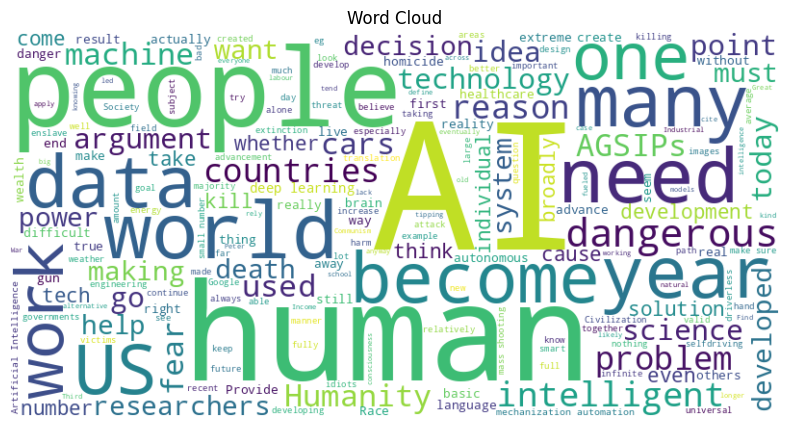

In [30]:
# 8. Word Cloud Visualization
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(
    " ".join(filtered_tokens)
)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud")
plt.show()
